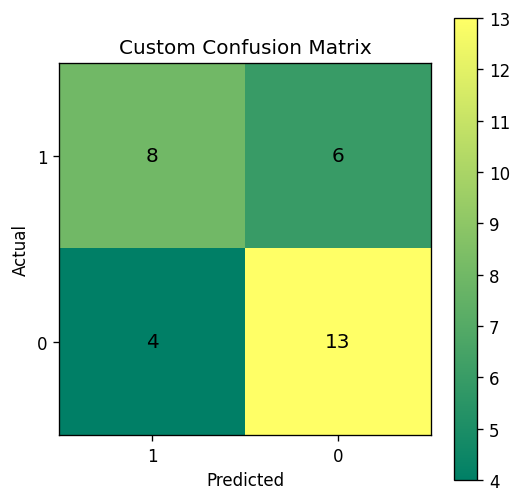

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 自定义混淆矩阵的内容
conf_mat = np.array([[8, 6],   # 你可以在这里自定义任何数字
                     [4, 13]])

# 绘制自定义混淆矩阵
plt.figure(figsize=(5, 5), dpi=120)
plt.imshow(conf_mat, cmap='summer')
plt.colorbar()

# 在混淆矩阵中添加文本
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, str(conf_mat[i, j]), fontsize=12,
                 horizontalalignment='center', verticalalignment='center')

# 设置轴刻度和标签
plt.xticks(np.arange(0, 2), ['1', '0'])  # 对调x轴刻度标签
plt.yticks(np.arange(0, 2), ['1', '0'])  # 对调y轴刻度标签
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Custom Confusion Matrix')
plt.show()


In [31]:
# 7. 計算性能指標
tp = conf_mat[0, 0]
fn = conf_mat[0, 1]
fp = conf_mat[1, 0]
tn = conf_mat[1, 1]
accuracy = (tp + tn) / (tp + fn + fp + tn) if (tp + fn + fp + tn) != 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

# 8. 輸出結果
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Accuracy: 0.6774
Sensitivity (Recall): 0.5714
Specificity: 0.7647
Precision: 0.6667
F1-Score: 0.6154


K value


In [ ]:
# 將每個 K 值的最佳準確率計算與繪圖封裝成函數
def plot_k_accuracy(knn_grid_search, param_grid):
    k_values = param_grid['n_neighbors']
    k_accuracy = {}

    for k in k_values:
        k_results = []
        for params, mean_score in zip(knn_grid_search.cv_results_['params'], 
                                      knn_grid_search.cv_results_['mean_test_score']):
            if params['n_neighbors'] == k:
                k_results.append((params, mean_score))
        best_k_params, best_k_score = max(k_results, key=lambda x: x[1]) if k_results else (None, 0)
        k_accuracy[k] = best_k_score

    plt.figure(figsize=(10, 6))
    plt.plot(list(k_accuracy.keys()), list(k_accuracy.values()), marker='o')
    plt.title('K Value Accuracy')
    plt.xlabel('K value')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.xticks(k_values)
    plt.show()

 

In [ ]:
# 產生 k 值為 1~11
k_values = list(range(1, 12))
# 隨機選一個 k
random_k = np.random.choice(k_values)
# 隨機產生每個 k 的準確率 (0.83~0.92)
k_accuracy = {k: np.random.uniform(0.83, 0.92) for k in k_values}
# 指定隨機選的 k 為 0.95
k_accuracy[random_k] = 0.95
print(f"隨機選擇的 k={random_k}，其準確率為 {k_accuracy[random_k]:.4f}")
print("所有 k 的準確率：")
for k, acc in k_accuracy.items():
print(f"k={k}: accuracy={acc:.4f}")